# Principal Component Analysis 

PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering and feature extraction

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#load the iris dataset
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,sep=',')

In [3]:
#validate the shape of the dataset
df.shape

(150, 5)

In [4]:
#view few rows of the dataset
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#rename the column names 
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
# drops the empty line at file-end
df.dropna(how="all", inplace=True) 


In [6]:
#validate the dataset again
df.head(3)

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [7]:
# split data table into data X and class labels y
X = df.ix[:,0:4].values
y = df.ix[:,4].values

In [8]:
#import pca from sklearn
from sklearn.decomposition import PCA

In [9]:
#start the pca with number of components equal to number of input variables (4)
pca = PCA(n_components=4)

In [10]:
#fit PCA on the input data
projected = pca.fit_transform(X)

In [11]:
# components shape
projected.shape

(150, 4)

## Visualize the variance 

In [12]:
#create an array equal to size of number of components
pca_components=np.arange(1,5)

In [13]:
#create a function to add the cummulative variance for each component
def cummulative_var(variance_list):
    #create empty list to save cummulative variance
    cummulative_variance=[]
    #define length of number of components
    length=len(variance_list)
    #create a for loop to iterate over each component
    for i in range(0,length):
        #add the sum of subsequent component variance to cummulative variance list
        cummulative_variance.append(sum(variance_list[0:i+1]))
    #return the final sum of variance list
    return cummulative_variance

In [14]:
#assign the cummulative variance to new variable
component_variance=cummulative_var(pca.explained_variance_ratio_)

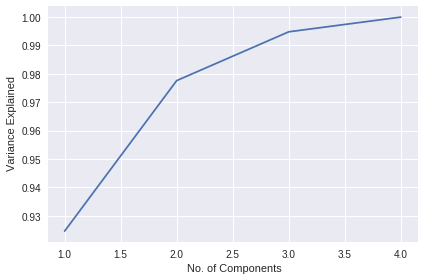

In [17]:
#plot the component vs variance values
plt.plot(pca_components,component_variance)
plt.xlabel(" No. of Components")
plt.ylabel(" Variance Explained")
plt.tight_layout()
plt.show()

As we can observe , using only two principal components we can capture close to 98 % of the variance in the data

## Repeating PCA with only two components

In [19]:
#PCA with only two components
pca_2 = PCA(n_components=2)

In [21]:
#fit PCA on the input data
projected_2 = pca_2.fit_transform(X)

## Plotting components along with labels

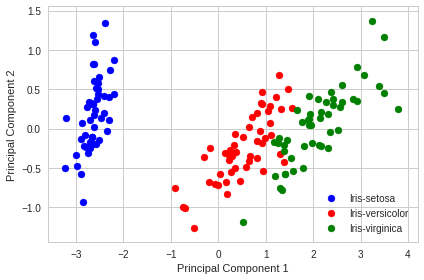

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(projected_2[y==lab, 0],
                    projected_2[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

## Another Example

In [31]:
#load the dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [32]:
#shape of the input data
digits.data.shape

(1797, 64)

In [33]:
#row contains 64 values 
digits.data[:3]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

In [34]:
# Running PCA with all 64 components 
pca_digits = PCA(n_components=64)

In [37]:
#fitting it on the dataset
projected_digits = pca_digits.fit_transform(digits.data)

In [38]:
#shape of the components
print(projected_digits.shape)

(1797, 64)


### Visualize the variance

In [39]:
#create an array equal to size of number of components
pca_components=np.arange(1,65)

In [40]:
pca_components

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [41]:
#create a function to add the cummulative variance for each component
def cummulative_var(variance_list):
    #create empty list to save cummulative variance
    cummulative_variance=[]
    #define length of number of components
    length=len(variance_list)
    #create a for loop to iterate over each component
    for i in range(0,length):
        #add the sum of subsequent component variance to cummulative variance list
        cummulative_variance.append(sum(variance_list[0:i+1]))
    #return the final sum of variance list
    return cummulative_variance

In [42]:
#assign the cummulative variance to new variable
component_variance=cummulative_var(pca_digits.explained_variance_ratio_)

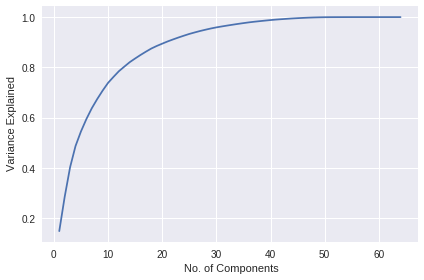

In [43]:
#plot the component vs variance values
plt.plot(pca_components,component_variance)
plt.xlabel(" No. of Components")
plt.ylabel(" Variance Explained")
plt.tight_layout()
plt.show()

As we observe 40 components accounts for 100 percent variability in data but for sake of visualization , we will only do PCA with only 2 components 

### 2 Components

In [44]:
#PCA with only two components
digits_pca_2 = PCA(n_components=2)

In [45]:
#fit PCA on the input data
digits_projected_2 = digits_pca_2.fit_transform(digits.data)

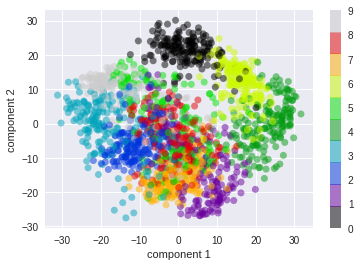

In [46]:
plt.scatter(digits_projected_2[:, 0], digits_projected_2[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();